In [12]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_42694/1127659990.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_42694/1127659990.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [18]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test= np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# Zad
Nauczmy prosty model.

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2023-06-09 19:06:20.412646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [15]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3911 - accuracy: 0.8137 - val_loss: 0.3672 - val_accuracy: 0.8292
Epoch 2/100
943/943 [==============================] - 1s 914us/step - loss: 0.3725 - accuracy: 0.8195 - val_loss: 0.3799 - val_accuracy: 0.8148
Epoch 3/100
943/943 [==============================] - 1s 912us/step - loss: 0.3753 - accuracy: 0.8114 - val_loss: 0.3728 - val_accuracy: 0.7941
Epoch 4/100
943/943 [==============================] - 1s 909us/step - loss: 0.3720 - accuracy: 0.8127 - val_loss: 0.3718 - val_accuracy: 0.8133
Epoch 5/100
943/943 [==============================] - 1s 910us/step - loss: 0.3718 - accuracy: 0.8117 - val_loss: 0.3692 - val_accuracy: 0.8175
Epoch 6/100
943/943 [==============================] - 1s 911us/step - loss: 0.3696 - accuracy: 0.8143 - val_loss: 0.3641 - val_accuracy: 0.8152
Epoch 7/100
943/943 [==============================] - 1s 909us/step - loss: 0.3681 - accuracy: 0.8164 - val_loss: 0.3642 - val_accu

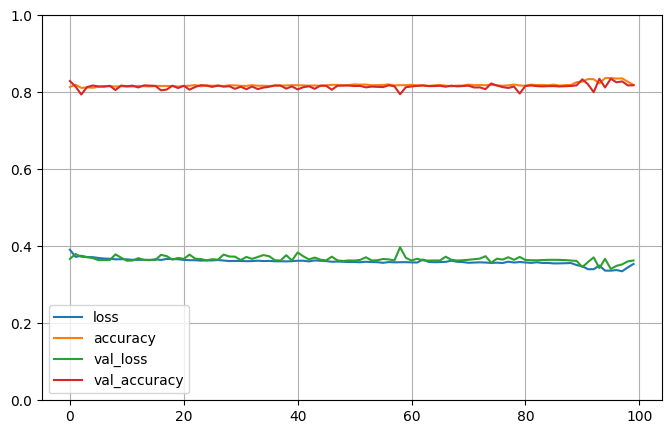

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 513us/step - loss: 0.3631 - accuracy: 0.8183


[0.363130122423172, 0.8183267116546631]

In [20]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred = np.argmax(model.predict(X_test),axis=1) )

471/471 [==============================] - 0s 424us/step


0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

*********************** sigmoid *************************
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4881 - accuracy: 0.7703 - val_loss: 0.3965 - val_ac

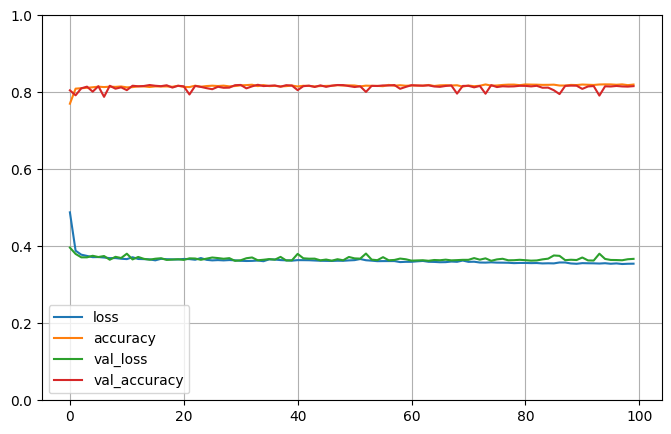

471/471 [==============================] - 0s 510us/step - loss: 0.3673 - accuracy: 0.8159


NameError: name 'metrics' is not defined

In [19]:
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

history = History()
model = Sequential()
def letsGO (act_fun):
    
    keras.backend.clear_session()

    print("***********************",act_fun,"*************************")
    
    history = History()
    model = Sequential()
    model.add(Dense(100,activation=act_fun,input_shape=(X_train.shape[1],)))
    model.add(Dense(50,activation=act_fun))
    model.add(Dense(10,activation=act_fun))
    model.add(Dense(1,activation=act_fun))
    model.summary()
    
    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])
    
    history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    model.evaluate(X_test,y_test)
    metrics.accuracy_score(y_true= y_test, y_pred = np.argmax(model.predict(X_test),axis=1) )


In [ ]:
act_fun=['sigmoid','tanh','relu','elu','LeakyReLU']

for af in act_fun:
    letsGO(af)

*********************** sigmoid *************************
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.7889 - val_loss: 0.3750 - val_ac

# Zad. 
Stwórz wykres porównujący metody. 